# Importing needed packages and libraries

In [133]:
# Dataframe
import pandas as pd

# Numbers and arrays
import numpy as np

# Plots and charts
import matplotlib.pyplot as plt
import seaborn as sns

# Dates and holidays
from datetime import date
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter

# Sklearn machine learning algorithms and metrics
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error, r2_score, cross_validation
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import KNNImputer, SimpleImputer, IterativeImputer
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor, AdaBoostClassifier, AdaBoostRegressor
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

ImportError: cannot import name 'cross_validation' from 'sklearn.metrics' (C:\Users\lover\anaconda3\lib\site-packages\sklearn\metrics\__init__.py)

# Reading the files into dataframes

In [2]:
key = pd.read_csv("key.csv")
sales = pd.read_csv("sales.csv")
weather = pd.read_csv("weather.csv")

# Key dataset (Exploration, Visualization and Preprocessing) :

In [3]:
display(key.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   store_nbr    45 non-null     int64
 1   station_nbr  45 non-null     int64
dtypes: int64(2)
memory usage: 848.0 bytes


None

In [4]:
display(key)

store_nbr  station_nbr
0           1            1
1           2           14
2           3            7
3           4            9
4           5           12
5           6           14
6           7            6
7           8            4
8           9           17
9          10           12
10         11           10
11         12           11
12         13            6
13         14           16
14         15           13
15         16            2
16         17           20
17         18           17
18         19           15
19         20            7
20         21            3
21         22           10
22         23           17
23         24            9
24         25           13
25         26           17
26         27           10
27         28            7
28         29            3
29         30           19
30         31           17
31         32           13
32         33            3
33         34           17
34         35            5
35         36           18
36         37           13
37         38           14
38         39            8
39         40           13
40         41           12
41         42           14
42         43           11
43         44           12
44         45           16

As noticed, the data contains two int columns, without any missing values and thus, needs no further preprocessing.

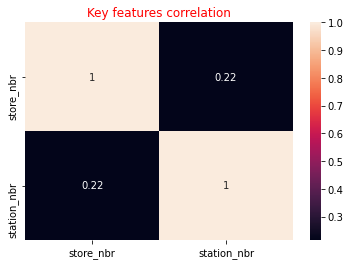

In [5]:
sns.heatmap(key.corr(), annot= True)
plt.title("Key features correlation", color= 'red')
plt.show()

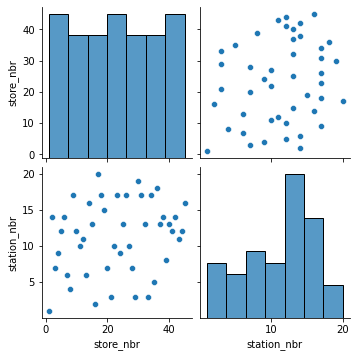

In [6]:
sns.pairplot(key)
plt.show()

In conclusion key maps store to a station. In order to know a store is forecasted by which station.

No need for further preprocessing as there are no missing values, and no features to add.

# Sales dataset (Exploration, Visualization and Preprocessing) :

In [7]:
display(sales.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4617600 entries, 0 to 4617599
Data columns (total 4 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   date       object
 1   store_nbr  int64 
 2   item_nbr   int64 
 3   units      int64 
dtypes: int64(3), object(1)
memory usage: 140.9+ MB


None

In [8]:
display(sales.isna().sum())

date         0
store_nbr    0
item_nbr     0
units        0
dtype: int64

In [9]:
display(sales.sample(20))

date  store_nbr  item_nbr  units
1872362  2013-01-14         11        15      0
560027   2012-04-24         30        33      0
2268596  2013-04-04         24        90      0
3550356  2014-02-12         20        22      0
3272811  2013-12-11         11        88      0
4447877  2014-09-20          2       108      0
4389873  2014-09-05          8        46      0
4333317  2014-08-22         25       100      0
3890449  2014-04-28         39        11      0
1673473  2012-12-04         19        38      0
3623323  2014-02-28         42        62      0
3796729  2014-04-08         26        86      0
3066163  2013-10-25         23        11      0
486647   2012-04-09         29        24      0
965438   2012-07-15         30        72      0
2335854  2013-04-22         21        82      0
3921020  2014-05-05         19        57      0
1327021  2012-09-26          3        17      0
3322621  2013-12-21         42        59      0
1976765  2013-02-04          6        78      0

As noticed, there are no missing values but date column is of type object and we need to cast into datetime type in order to add features like weekDay,month,year and holiday.

In [11]:
sales['date'] = pd.to_datetime(sales['date'])

Example of possible of visualization of sales data, item 9 sales (units) in store 1.

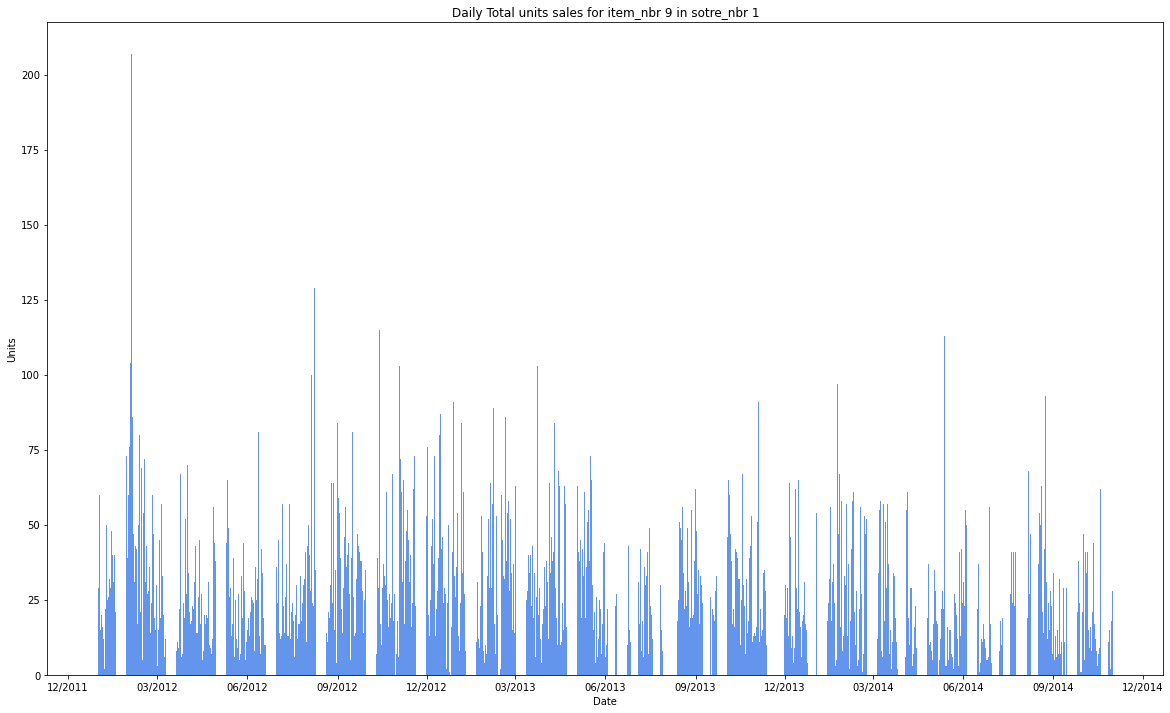

In [15]:
store1 = sales.groupby(['store_nbr', 'item_nbr']).get_group((1,9))
# Create figure and plot space
fig, ax = plt.subplots(figsize=(20, 12))

# Add x-axis and y-axis
ax.bar(store1['date'],
       store1['units'],
       color='cornflowerblue')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Units",
       title="Daily Total units sales for item_nbr 9 in sotre_nbr 1")

# Define the date format
date_form = DateFormatter("%m/%Y")
ax.xaxis.set_major_formatter(date_form)

# Ensure a major tick for each quarter using (interval=3) 
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.show()

We can notice that the average unit sales of itme 9 in store 1 is around 100, but at march 2012 there was a significant increase in units sales up to 200.

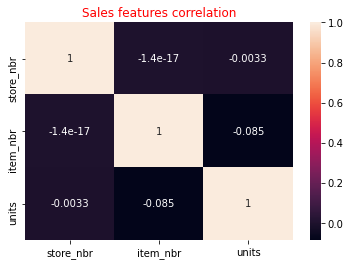

In [16]:
sns.heatmap(sales.corr(), annot=True)
plt.title("Sales features correlation", color= 'red')
plt.show()

<Figure size 1440x1440 with 0 Axes>

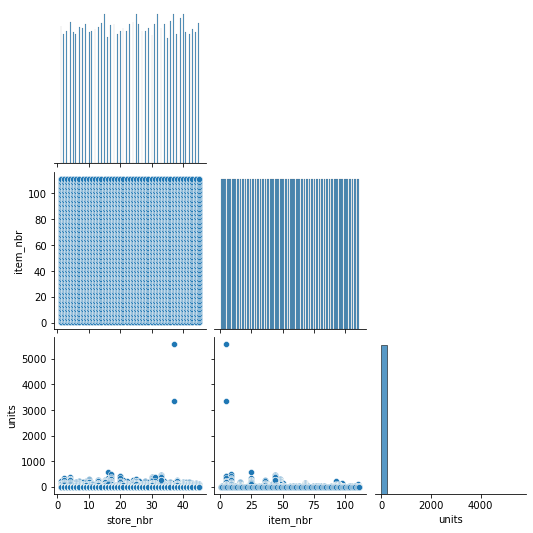

In [17]:
plt.figure(figsize=(20,20))
sns.pairplot(sales, corner= True)
plt.show()

As noticed there is no high correlated features, but visualizing as pairs shows that item 1 in store 35 had a significantly high unit sales.

Also we can notice that date was not included in the correlation, therefore will add numericDate to include it and check for further notices.

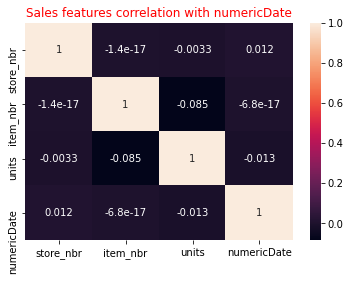

In [18]:
sales['numericDate'] = pd.to_numeric(sales['date'])
sns.heatmap(sales.corr(), annot= True)
plt.title("Sales features correlation with numericDate", color= 'red')
plt.show()

<Figure size 1440x1440 with 0 Axes>

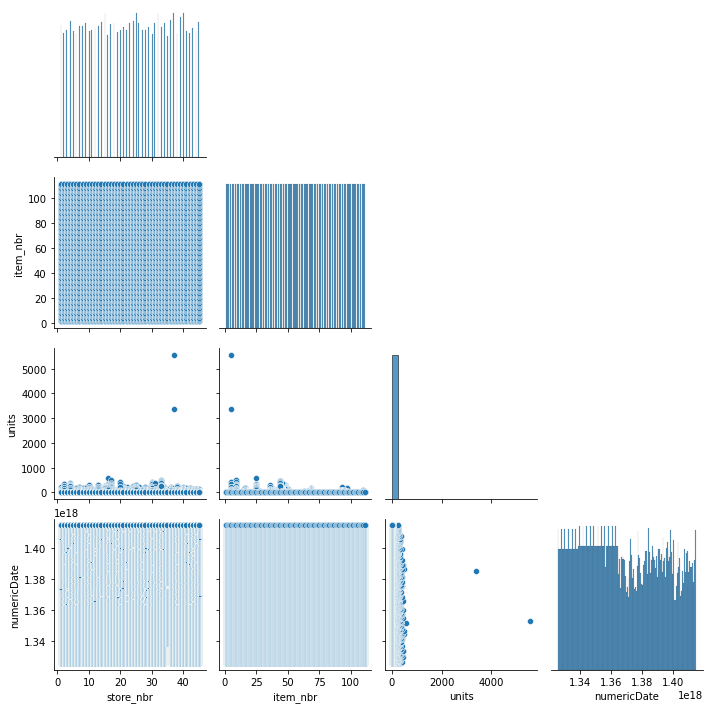

In [19]:
plt.figure(figsize=(20,20))
sns.pairplot(sales, corner= True)
plt.show()

Adding numeric date shows two significant unit sales.

Now, we will add additional features starting with weekDay to see whether sales are higher in a specific day of the week.

In [23]:
sales['year'] = sales['date'].dt.year
sales['month'] = sales['date'].dt.month
sales['weekDay'] = sales['date'].dt.dayofweek
display(sales.sample(20))

date  store_nbr  item_nbr  units          numericDate  weekDay  \
1773403 2012-12-24         19        68      0  1356307200000000000        0   
1208151 2012-09-02         12        28      0  1346544000000000000        6   
3460188 2014-01-23         19        97      0  1390435200000000000        3   
1393549 2012-10-09         17        56      0  1349740800000000000        1   
2572596 2013-06-23         21        61      0  1371945600000000000        6   
4588123 2014-10-25         44        50      0  1414195200000000000        5   
2887735 2013-09-09          8        71      0  1378684800000000000        0   
2074083 2013-02-23         28        49      0  1361577600000000000        5   
812526  2012-06-15          3         7      0  1339718400000000000        4   
2832731 2013-08-28          7        12      0  1377648000000000000        2   
800159  2012-06-12         26        72      0  1339459200000000000        1   
4607067 2014-10-29         41        13      0  1414540800000000000        2   
912391  2012-07-05          2        83      0  1341446400000000000        3   
753781  2012-06-03         13        92      0  1338681600000000000        6   
3365456 2013-12-31         39        48      0  1388448000000000000        1   
2078100 2013-02-24         19        70      0  1361664000000000000        6   
785623  2012-06-09         30        77      0  1339200000000000000        5   
3249678 2013-12-05         39        43      0  1386201600000000000        3   
3028476 2013-10-17         37        64      0  1381968000000000000        3   
1307599 2012-09-22          8        20      0  1348272000000000000        5   

         year  month  
1773403  2012     12  
1208151  2012      9  
3460188  2014      1  
1393549  2012     10  
2572596  2013      6  
4588123  2014     10  
2887735  2013      9  
2074083  2013      2  
812526   2012      6  
2832731  2013      8  
800159   2012      6  
4607067  2014     10  
912391   2012      7  
753781   2012      6  
3365456  2013     12  
2078100  2013      2  
785623   2012      6  
3249678  2013     12  
3028476  2013     10  
1307599  2012      9

In [26]:
display(sales['year'].unique())
display(sales['month'].unique())
display(sales['weekDay'].unique())

array([2012, 2013, 2014], dtype=int64)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

array([6, 0, 1, 2, 3, 4, 5], dtype=int64)

In [69]:
# adding season categorical column
sales['date_offset'] = (sales.date.dt.month*100 + sales.date.dt.day - 320)%1300

sales['season'] = pd.cut(sales['date_offset'], [0, 300, 602, 900, 1300], 
                      labels=['spring', 'summer', 'autumn', 'winter'])
sales = sales.drop(columns=['date_offset'])
sales = sales.fillna('spring')
display(sales.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4617600 entries, 0 to 4617599
Data columns (total 9 columns):
 #   Column       Dtype         
---  ------       -----         
 0   date         datetime64[ns]
 1   store_nbr    int64         
 2   item_nbr     int64         
 3   units        int64         
 4   numericDate  int64         
 5   weekDay      int64         
 6   year         int64         
 7   month        int64         
 8   season       category      
dtypes: category(1), datetime64[ns](1), int64(7)
memory usage: 286.2 MB


None

In [70]:
display(sales.sample(20))

date  store_nbr  item_nbr  units          numericDate  weekDay  \
2922703 2013-09-18         40        74      0  1379462400000000000        2   
2879592 2013-09-07         10        31      0  1378512000000000000        5   
1320079 2012-09-24         30        68      0  1348444800000000000        0   
2413446 2013-05-10         16        85      0  1368144000000000000        4   
3704455 2014-03-19         36        53      0  1395187200000000000        2   
1258260 2012-09-12         13        76      0  1347408000000000000        2   
1201290 2012-08-31         40        49      0  1346371200000000000        4   
3765827 2014-04-02          7        42      0  1396396800000000000        2   
266931  2012-02-24         29        88      0  1330041600000000000        4   
2566327 2013-06-22          2         8      0  1371859200000000000        5   
1414440 2012-10-13         25        79      0  1350086400000000000        5   
2026920 2013-02-14          8        61      0  1360800000000000000        3   
2120409 2013-03-04         40        88      0  1362355200000000000        0   
3841233 2014-04-18         32        79      0  1397779200000000000        4   
4482611 2014-09-28          2        99      0  1411862400000000000        6   
1365250 2012-10-03         32        62      0  1349222400000000000        2   
2636584 2013-07-07         19         2      0  1373155200000000000        6   
187452  2012-02-08         17        85      0  1328659200000000000        2   
21172   2012-01-05         15        83      0  1325721600000000000        3   
882055  2012-06-28         44        50      0  1340841600000000000        3   

         year  month  season  
2922703  2013      9  summer  
2879592  2013      9  summer  
1320079  2012      9  autumn  
2413446  2013      5  spring  
3704455  2014      3  winter  
1258260  2012      9  summer  
1201290  2012      8  summer  
3765827  2014      4  spring  
266931   2012      2  winter  
2566327  2013      6  summer  
1414440  2012     10  autumn  
2026920  2013      2  winter  
2120409  2013      3  winter  
3841233  2014      4  spring  
4482611  2014      9  autumn  
1365250  2012     10  autumn  
2636584  2013      7  summer  
187452   2012      2  winter  
21172    2012      1  winter  
882055   2012      6  summer

In [71]:
display(sales.isna().sum())

date           0
store_nbr      0
item_nbr       0
units          0
numericDate    0
weekDay        0
year           0
month          0
season         0
dtype: int64

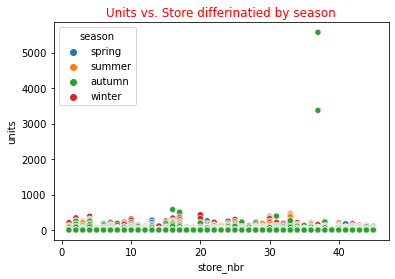

In [72]:
sns.scatterplot(data= sales, x= 'store_nbr', y= 'units', hue='season')
plt.title("Units vs. Store differinatied by season", color='red')
plt.show()

In [92]:
cal = calendar()
holidays = cal.holidays(start=sales['date'].min(), end=sales['date'].max())
sales['holiday'] = sales['date'].isin(holidays)

In [93]:
display(sales.sample(20))

date  store_nbr  item_nbr  units          numericDate  weekDay  \
1432277 2012-10-17          6        45     58  1350432000000000000        2   
246274  2012-02-20         19        77      0  1329696000000000000        0   
3227412 2013-11-30         41        88      0  1385769600000000000        5   
3013678 2013-10-13         45        29      0  1381622400000000000        6   
1500343 2012-10-30         34        68      0  1351555200000000000        1   
3527197 2014-02-07         14        62      0  1391731200000000000        4   
3370604 2014-01-02         20        90      0  1388620800000000000        3   
2379895 2013-05-02          9        56      0  1367452800000000000        3   
258103  2012-02-22         39        29      0  1329868800000000000        2   
560077  2012-04-24         30        83      0  1335225600000000000        1   
4228168 2014-07-26         33        68      0  1406332800000000000        5   
3662028 2014-03-09         29        28      0  1394323200000000000        6   
1369065 2012-10-04         21       103      0  1349308800000000000        3   
3600135 2014-02-23         40        73      0  1393113600000000000        6   
969026  2012-07-16         17       108      0  1342396800000000000        0   
691687  2012-05-21         28        47      0  1337558400000000000        0   
2753951 2013-08-09          4        42      0  1376006400000000000        4   
877025  2012-06-27         44        15      0  1340755200000000000        2   
915886  2012-07-05         34        26      0  1341446400000000000        3   
1339836 2012-09-28         28        67      0  1348790400000000000        4   

         year  month  season  holiday  
1432277  2012     10  autumn    False  
246274   2012      2  winter     True  
3227412  2013     11  autumn    False  
3013678  2013     10  autumn    False  
1500343  2012     10  autumn    False  
3527197  2014      2  winter    False  
3370604  2014      1  winter    False  
2379895  2013      5  spring    False  
258103   2012      2  winter    False  
560077   2012      4  spring    False  
4228168  2014      7  summer    False  
3662028  2014      3  winter    False  
1369065  2012     10  autumn    False  
3600135  2014      2  winter    False  
969026   2012      7  summer    False  
691687   2012      5  spring    False  
2753951  2013      8  summer    False  
877025   2012      6  summer    False  
915886   2012      7  summer    False  
1339836  2012      9  autumn    False

In [94]:
display(sales.isna().sum())

date           0
store_nbr      0
item_nbr       0
units          0
numericDate    0
weekDay        0
year           0
month          0
season         0
holiday        0
dtype: int64

comparing sales in holidays and non holidays

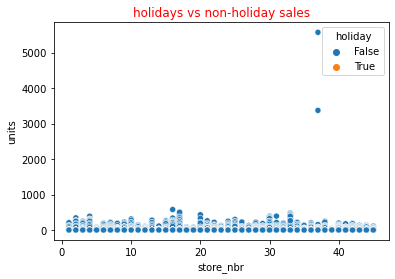

In [97]:
sns.scatterplot(data= sales, x='store_nbr', y='units', hue='holiday')
plt.title("holidays vs non-holiday sales", color= 'red')
plt.show()

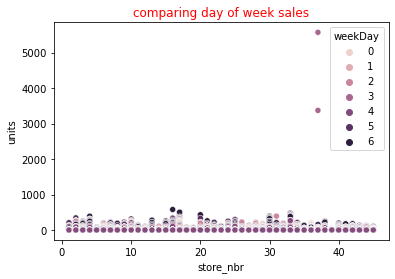

In [98]:
sns.scatterplot(data= sales, x='store_nbr', y='units', hue='weekDay')
plt.title("comparing day of week sales", color= 'red')
plt.show()

# ًWeather dataset (Exploration, Visualization and Preprocessing) :

In [99]:
display(weather.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20517 entries, 0 to 20516
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   station_nbr  20517 non-null  int64 
 1   date         20517 non-null  object
 2   tmax         20517 non-null  object
 3   tmin         20517 non-null  object
 4   tavg         20517 non-null  object
 5   depart       20517 non-null  object
 6   dewpoint     20517 non-null  object
 7   wetbulb      20517 non-null  object
 8   heat         20517 non-null  object
 9   cool         20517 non-null  object
 10  sunrise      20517 non-null  object
 11  sunset       20517 non-null  object
 12  codesum      20517 non-null  object
 13  snowfall     20517 non-null  object
 14  preciptotal  20517 non-null  object
 15  stnpressure  20517 non-null  object
 16  sealevel     20517 non-null  object
 17  resultspeed  20517 non-null  object
 18  resultdir    20517 non-null  object
 19  avgspeed     20517 non-nu

None

In [101]:
for col in weather.columns:
    print(col, ' has a total of ', weather[col].isna().sum(), ' null values')
    print(col, 'unique values are: ', weather[col].unique())

station_nbr  has a total of  0  null values
station_nbr unique values are:  [ 1  2  3  4  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20  5]
date  has a total of  0  null values
date unique values are:  ['2012-01-01' '2012-01-02' '2012-01-03' ... '2014-10-29' '2014-10-30'
 '2014-10-31']
tmax  has a total of  0  null values
tmax unique values are:  ['52' '48' '55' '63' '50' '66' '34' '73' '72' '38' '56' '59' '46' '45'
 '60' '44' '21' '65' '43' '53' '25' '32' '28' '62' '61' '47' '30' '26'
 '71' '58' '39' '54' '23' '27' '31' '68' '70' '67' '36' '69' '74' '75'
 '33' '51' '57' '41' '49' '76' '35' '77' '64' '40' '16' '37' '42' '14'
 '22' '13' '10' '20' '24' '80' '4' '11' '78' '17' '18' '79' '29' '81' '82'
 '83' '88' '87' '92' '89' '84' '85' '86' '90' '91' '94' '93' '96' '95' 'M'
 '97' '98' '101' '99' '100' '105' '103' '102' '106' '104' '109' '107'
 '108' '110' '111' '112' '114' '113' '19' '15' '12' '-1' '5' '8' '9' '1'
 '6' '2' '3' '7' '-2' '-11' '-4' '-6' '0']
tmin  has a total of  0  null val

In [102]:
display(weather.sample(20))

station_nbr        date tmax tmin tavg depart dewpoint wetbulb heat  \
7301            14  2013-01-07   51   21   36      0       23      31   29   
2042            11  2012-04-17   84   57   71      4       59      64    0   
4077            10  2012-07-30   92   77   85      M       73      75    0   
4403            16  2012-08-15   84   66   75      M       67      69    0   
8400            13  2013-03-03   57   37   47      M       22      37   18   
10873            6  2013-07-05   98   65   82     -1       62      70    0   
12450           14  2013-09-23   83   56   70     -1       52      59    0   
19368           12  2014-09-04   88   73   81      M       72      75    0   
19095           19  2014-08-21   77   65   71      2       67      68    0   
13347           11  2013-11-07   82   66   74     10       65      67    0   
11519           18  2013-08-06  105   82   94      7       64      74    0   
4229             2  2012-08-07   81   63   72      2       58      63    0   
16149           13  2014-03-27   55   34   45      M       19      34   20   
4131             4  2012-08-02  102   74   88      2       68      74    0   
16912           16  2014-05-04   61   48   55      M       38      46   10   
6859            12  2012-12-16   77   54   66      M       60      62    0   
1903             4  2012-04-10   84   61   73      5       59      64    0   
14622            6  2014-01-10   71   58   65      M       60      62    0   
1270            18  2012-03-07   71   64   68     12       59      62    0   
11058           11  2013-07-14   86   70   78     -4       71      73    0   

      cool sunrise sunset     codesum snowfall preciptotal stnpressure  \
7301     0    0740   1734                  0.0        0.00       28.77   
2042     6    0558   1856                  0.0        0.00       30.11   
4077    20    0544   1923  TS TSRA RA        M        0.08       29.96   
4403    10       -      -  TSRA RA BR        M        2.04       29.76   
8400     0       -      -                    M        0.00       24.00   
10873   17    0534   1936                  0.0        0.00       29.39   
12450    5    0619   1828                  0.0        0.00       28.46   
19368   16       -      -       RA BR      0.0        0.03       30.03   
19095    6    0504   1846       RA BR      0.0        0.44       29.20   
13347    9    0646   1735       RA BR      0.0           T       29.99   
11519   29    0544   1923                  0.0        0.00       29.33   
4229     7    0446   1860                  0.0        0.00       28.92   
16149    0       -      -                    M        0.00       23.92   
4131    23    0550   1925                  0.0        0.00       29.18   
16912    0       -      -          RA        M        0.01       29.47   
6859     1       -      -   FG+ FG BR      0.0        0.00       29.98   
1903     8    0610   1855                  0.0        0.00       29.39   
14622    0       -      -    RA DZ BR      0.0        0.22       29.32   
1270     3    0648   1828    RA DZ BR      0.0        0.02       29.41   
11058   13    0534   1931                  0.0           T       30.03   

      sealevel resultspeed resultdir avgspeed  
7301     30.21         8.3        17      8.6  
2042     30.14         5.9        14      6.6  
4077     29.98         8.0        21      9.2  
4403     29.85         3.2        17      4.5  
8400     29.73         4.6        18      7.3  
10873    29.89         4.3        15      5.3  
12450    29.80        10.3        16     11.1  
19368    30.08         2.9        10      3.7  
19095    29.92         3.3        13      4.9  
13347    30.03         4.1        32      4.6  
11519    29.84        10.1        18     10.6  
4229     30.00         3.1        25      6.2  
16149    29.59         7.8        32     10.8  
4131     29.85         3.8        17      6.2  
16912    29.56        12.9        27     13.7  
6859     30.02         1.7        15      2.7

As noticed, all the features but station_Nbr are of type object, thus lead us to explore the different unique values in order to know why it is not numeric though it should be. 

We noticed ('-', ' ', 'T', ' T', 'M') which need to be replaced with null except for T which stands for Trace which is a very small positive number which will be replaced with 0.001.

In addition codesum will be used to create a numeric WeatherCode column and then original codesum will be dropped.

In [103]:
# Start with casting date into datetime and adding numericDate column
weather['date'] = pd.to_datetime(weather['date'])
weather['numericDate'] = pd.to_numeric(weather['date'])

In [104]:
def clean_data(df):
    WeatherCode = ['FC', 'TS', 'GR', 'RA', 'DZ', 'SN', 'SG', 'GS', 'PL', 'IC', 'FG', 'BR', 'UP', 'HZ', 'FU', 'VA', 
               'DU', 'DS', 'PO', 'SA', 'SS', 'PY', 'SQ', 'DR', 'SH', 'FZ', 'MI', 'PR', 'BC', 'BL', 'VC', '+']
    df['WeatherCode'] = pd.Series(list(map(lambda x: sum(list(map(lambda y: x.find(y) >= 0, WeatherCode))), df.codesum)), index = df.index)
    for col in df.columns:
        df = df.replace(('-', ' '), np.nan)
        df = df.replace('M', np.nan)
        df = df.replace(('T', '  T'), 0.001)
        
        
    num_attr = ['tmax', 'tmin', 'tavg', 'dewpoint', 'wetbulb', 'heat', 'cool','sunset', 'sunrise', 'snowfall', 
                'preciptotal', 'stnpressure','sealevel', 'resultspeed', 'resultdir', 'avgspeed']
    df[num_attr] = df[num_attr].astype(float)
    df = df.loc[:,df.isnull().sum()< df.shape[0]*.5]
    return df


weather = clean_data(weather)

In [105]:
# adding year, month and weekDay
weather['weekDay'] = weather['date'].dt.dayofweek
weather['month'] = weather['date'].dt.month
weather['year'] = weather['date'].dt.year
display(weather.sample(20))

station_nbr       date   tmax  tmin  tavg  dewpoint  wetbulb  heat  \
8230             3 2013-02-23   45.0  20.0  33.0      20.0     28.0  32.0   
8729             2 2013-03-20   33.0  21.0  27.0      16.0     24.0  38.0   
14476           20 2014-01-02   43.0  25.0  34.0      18.0     28.0  31.0   
8189             2 2013-02-21   30.0  20.0  25.0      10.0     19.0  40.0   
10618           11 2013-06-22   87.0  72.0  80.0      72.0     73.0   0.0   
10853            6 2013-07-04   96.0  63.0  80.0      59.0     67.0   0.0   
1848             7 2012-04-07   69.0  56.0  63.0      56.0     58.0   2.0   
18162            6 2014-07-06   93.0  68.0  81.0      69.0     73.0   0.0   
20048           12 2014-10-08   89.0  66.0  78.0      66.0     69.0   0.0   
17692           16 2014-06-12   66.0  57.0  62.0      54.0     57.0   3.0   
8741            14 2013-03-20   58.0  33.0  46.0      28.0     39.0  19.0   
14695           19 2014-01-13   44.0  27.0  36.0      29.0     33.0  29.0   
18178            2 2014-07-07   83.0  64.0  74.0      63.0     67.0   0.0   
5980            13 2012-11-02   54.0  38.0  46.0      28.0     38.0  19.0   
12002            6 2013-09-01  100.0  73.0  87.0      68.0     74.0   0.0   
19084            8 2014-08-21  101.0  79.0  90.0      74.0     78.0   0.0   
19044            8 2014-08-19  101.0  74.0   NaN       NaN      NaN   NaN   
10523           16 2013-06-17   84.0  57.0  71.0      59.0     62.0   0.0   
13307           11 2013-11-05   70.0  58.0  64.0      61.0     62.0   1.0   
18773           17 2014-08-05   92.0  71.0   NaN      67.0     71.0   NaN   

       cool  sunrise  ...  stnpressure  sealevel  resultspeed  resultdir  \
8230    0.0    702.0  ...        29.29     30.04          0.4       15.0   
8729    0.0    551.0  ...        28.63     29.76         13.5       27.0   
14476   0.0      NaN  ...        29.69     30.41         11.9       33.0   
8189    0.0    636.0  ...        28.73     29.91         16.6       30.0   
10618  15.0    525.0  ...        30.07     30.11          1.5       15.0   
10853  15.0    534.0  ...        29.41     29.93          2.2       14.0   
1848    0.0      NaN  ...        28.79     30.13          3.0        5.0   
18162  16.0    535.0  ...        29.48     30.00          6.5       17.0   
20048  13.0      NaN  ...        30.05     30.10          0.8        6.0   
17692   0.0      NaN  ...        30.01     30.11          8.7       12.0   
8741    0.0    634.0  ...        28.78     30.20          3.7        6.0   
14695   0.0      NaN  ...        28.85     29.61          6.9       25.0   
18178   9.0    418.0  ...        28.74     29.80         11.9       23.0   
5980    0.0      NaN  ...        24.27     30.02          4.5       14.0   
12002  22.0    607.0  ...        29.34     29.84          6.3       17.0   
19084  25.0      NaN  ...        29.66       NaN          9.1       18.0   
19044   NaN      NaN  ...        29.55       NaN          NaN        NaN   
10523   6.0      NaN  ...        29.70     29.81          4.5       25.0   
13307   0.0    644.0  ...        30.22     30.25         13.9        3.0   
18773   NaN      NaN  ...        29.37       NaN          3.6       19.0   

       avgspeed          numericDate  WeatherCode  weekDay  month  year  
8230        3.3  1361577600000000000            0        5      2  2013  
8729       13.7  1363737600000000000            0        2      3  2013  
14476      12.0  1388620800000000000            1        3      1  2014  
8189       17.6  1361404800000000000            0        3      2  2013  
10618       2.8  1371859200000000000            2        5      6  2013  
10853       3.6  1372896000000000000            0        3      7  2013  
1848       12.0  1333756800000000000            4        5      4  2012  
18162       6.8  1404604800000000000            3        6      7  2014  
20048       1.9  1412726400000000000            0        2     10  2014  
17692       9.0  1402531200000000000            1   

Time to explore features correlation

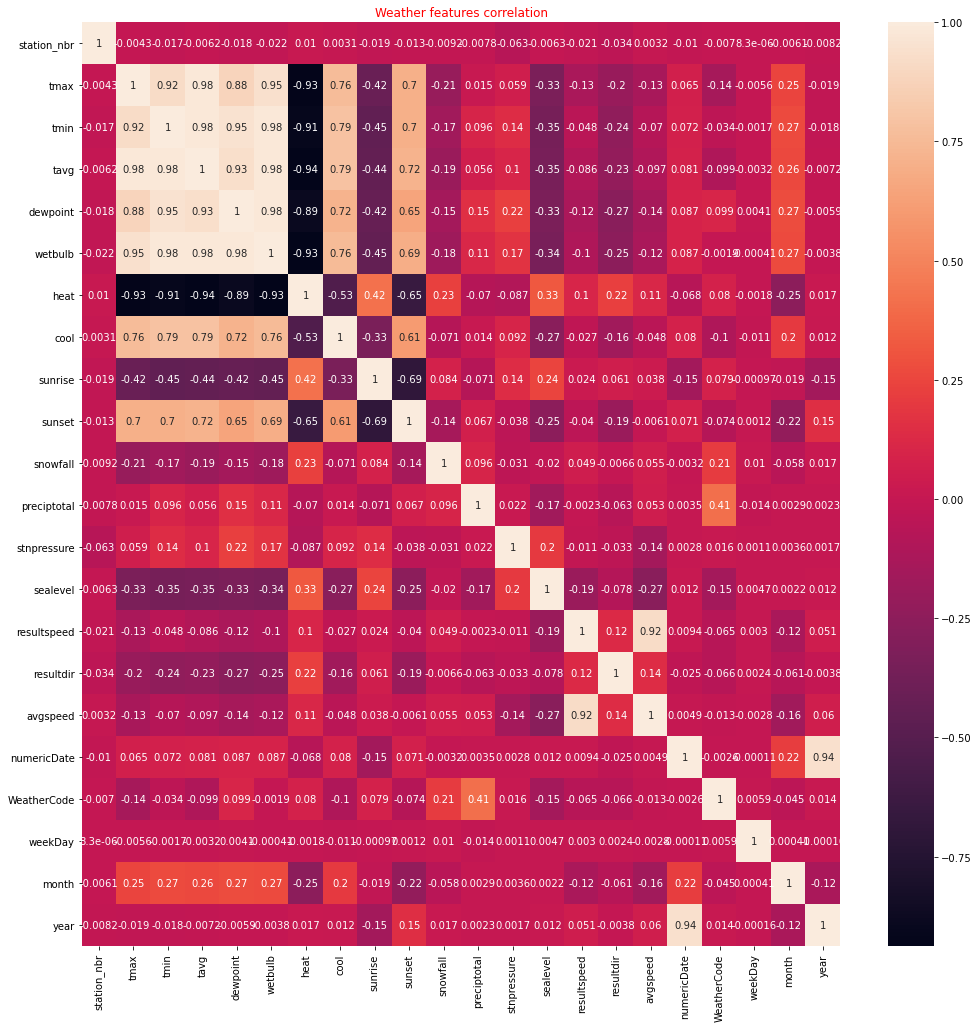

In [107]:
plt.figure(figsize=(17,17))
sns.heatmap(weather.corr(), annot=True)
plt.title("Weather features correlation", color= 'red')
plt.show()

<Figure size 1440x1440 with 0 Axes>

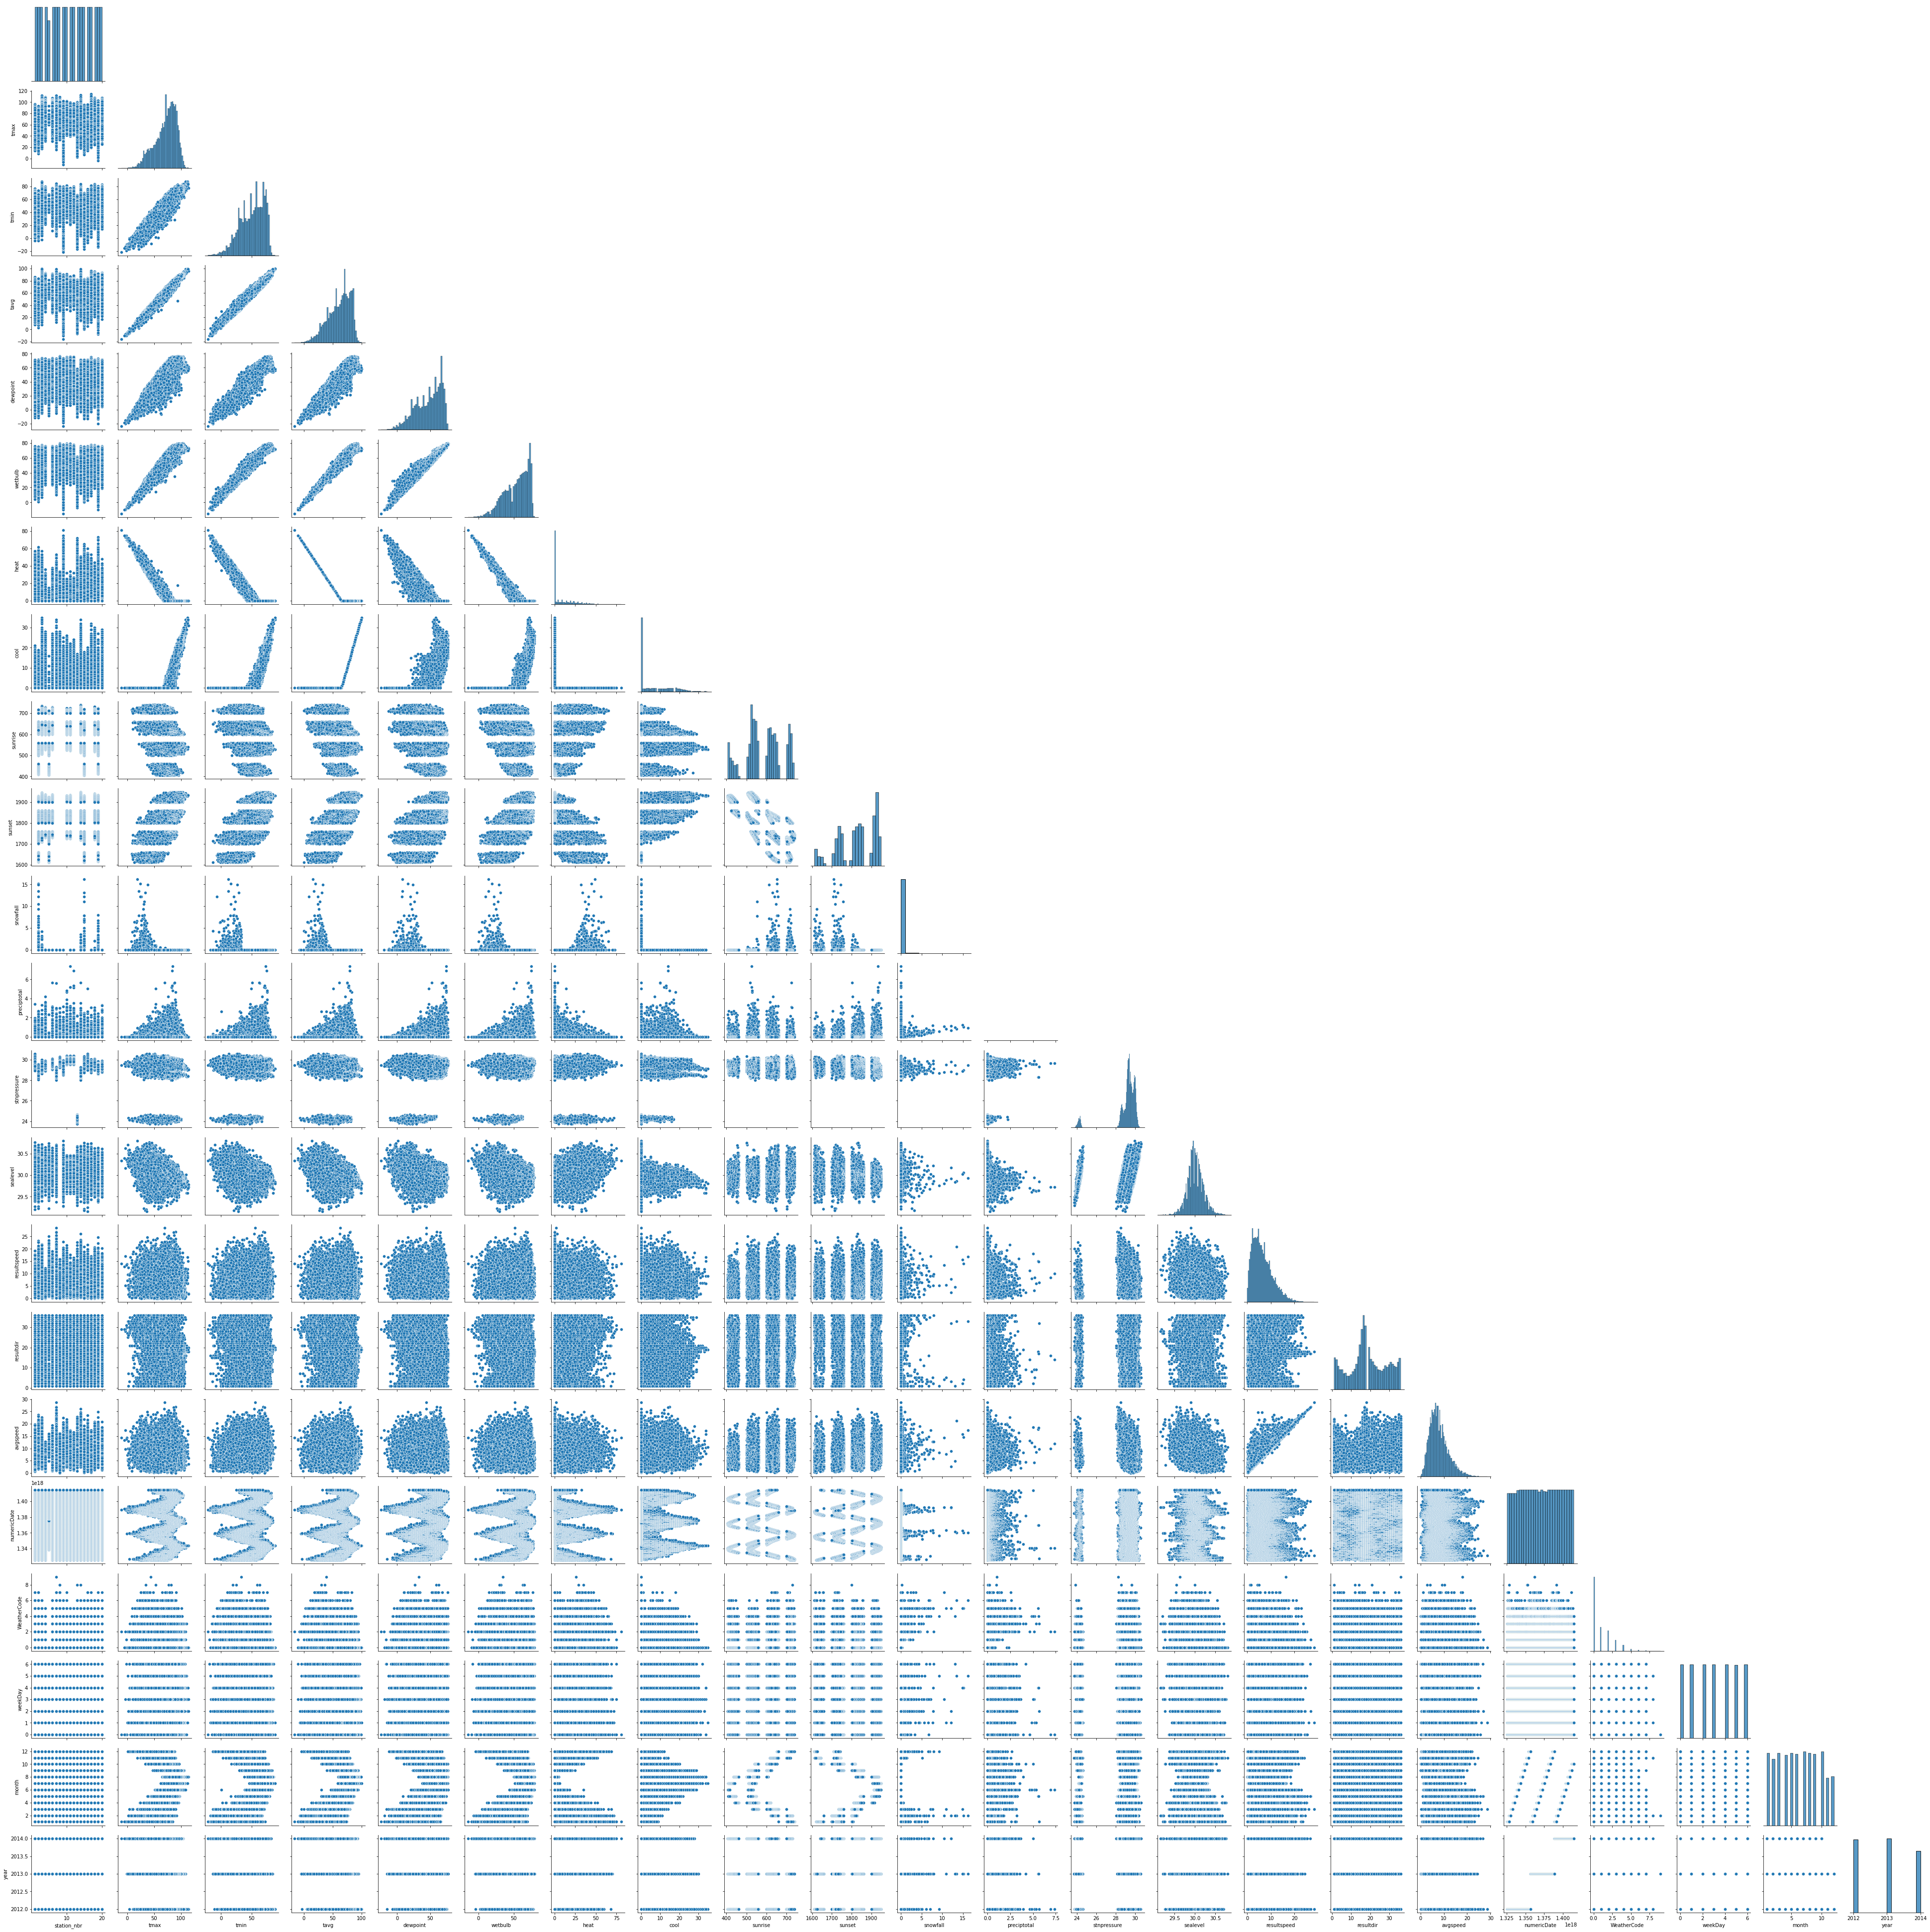

In [108]:
plt.figure(figsize=(20,20))
sns.pairplot(weather, corner=True)
plt.show()

Now that we can visualize, will plot daily preciptotal in station 1 as an example

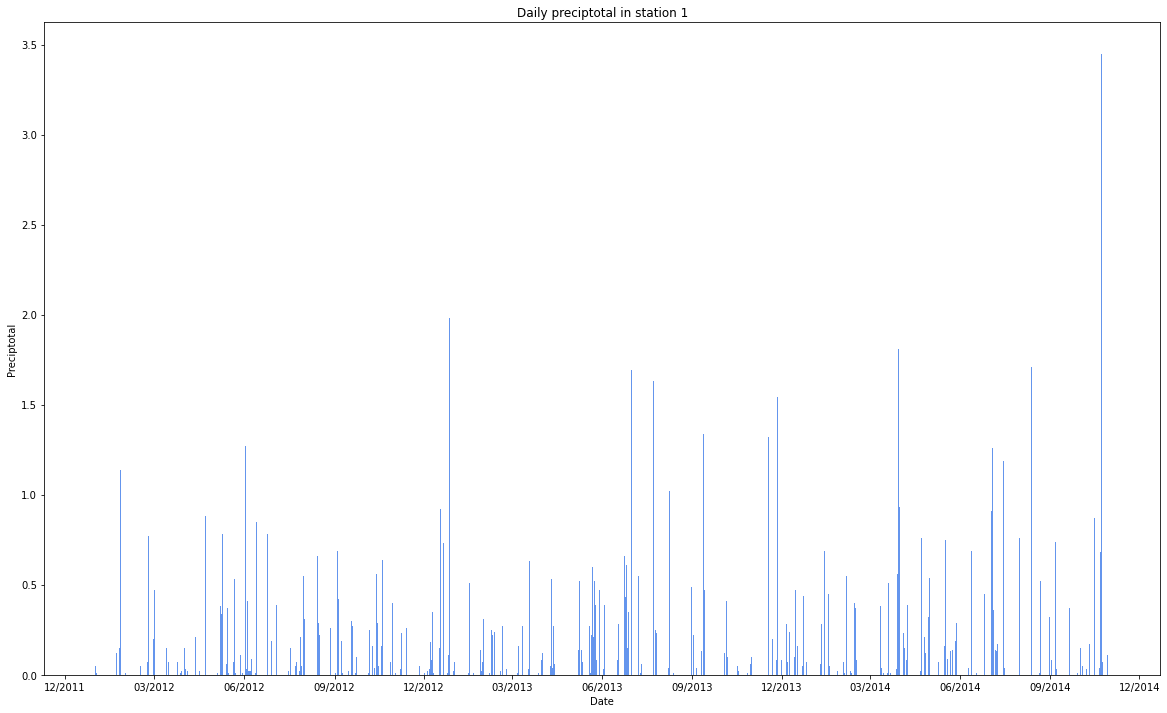

In [109]:
station1 = weather.groupby(['station_nbr']).get_group((1))
# Create figure and plot space
fig, ax = plt.subplots(figsize=(20, 12))

# Add x-axis and y-axis
ax.bar(pd.to_datetime(station1['date']),
       station1['preciptotal'],
       color='cornflowerblue')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Preciptotal",
       title="Daily preciptotal in station 1")

# Define the date format
date_form = DateFormatter("%m/%Y")
ax.xaxis.set_major_formatter(date_form)

# Ensure a major tick for each quarter using (interval=3) 
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.show()

In the correlation matrix we noticed out two blocks of highly correlated (>0.88) which we will reduce and keep only one member of each block.

In Addition, features/entires with high null values rate will be dropped to lower the bias, as imputing many values in the same feature/entry will distort the data.

In [110]:
# 1- dropping high correlated features (tmin, tmax, dewpoint, wetbulb, heat, resultspeed)
weather = weather.drop(columns=['tmin', 'tmax', 'dewpoint', 'wetbulb', 'heat', 'resultspeed'])

# 2- dropping features that have less than 65% non-null values
weather.dropna(axis=1, how='any', thresh=len(weather)*0.65, subset=None, inplace=True)
weather = weather.reset_index(drop=True) # reset the index to leave to no gaps

# 3- dropping entries that have less than 65% non-null values
weather.dropna(axis=0, how='any', thresh=len(weather.columns)*0.65, subset=None, inplace=True)
weather = weather.reset_index(drop=True) # reset the index to leave to no gaps

display(weather.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19650 entries, 0 to 19649
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   station_nbr  19650 non-null  int64         
 1   date         19650 non-null  datetime64[ns]
 2   tavg         19047 non-null  float64       
 3   cool         19047 non-null  float64       
 4   preciptotal  19644 non-null  float64       
 5   stnpressure  19580 non-null  float64       
 6   sealevel     18397 non-null  float64       
 7   resultdir    19524 non-null  float64       
 8   avgspeed     19639 non-null  float64       
 9   numericDate  19650 non-null  int64         
 10  WeatherCode  19650 non-null  int64         
 11  weekDay      19650 non-null  int64         
 12  month        19650 non-null  int64         
 13  year         19650 non-null  int64         
dtypes: datetime64[ns](1), float64(7), int64(6)
memory usage: 2.1 MB


None

There still are null values, this values will be imputed using knn imputer, in order to keep close as possible to the raw data.

In [113]:
knnimputer = KNNImputer(n_neighbors=7)
noNullWeather = pd.DataFrame(knnimputer.fit_transform(weather.drop(columns=['date'])))
noNullWeather.set_axis(['station_nbr', 'tavg', 'cool', 'preciptotal', 'stnpressure', 'sealevel', 'resultdir', 'avgspeed','numericDate', 'WeatherCode', 'weekDay', 'month', 'year'], axis=1, inplace=True)
noNullWeather['date'] = weather['date']
display(noNullWeather.sample(20))

station_nbr       tavg       cool  preciptotal  stnpressure   sealevel  \
6163          14.0  59.000000   0.000000        0.000        28.80  30.180000   
2115           8.0  63.714286   3.142857        0.000        29.64  29.974286   
356           16.0  23.000000   0.000000        0.001        30.06  30.150000   
18127         17.0  73.000000   8.000000        0.000        29.41  30.100000   
19290          2.0  50.000000   0.000000        0.000        29.21  30.320000   
1530          12.0  70.000000   5.000000        0.020        30.11  30.160000   
7755           3.0  44.000000   0.000000        0.010        29.18  30.001429   
17698          6.0  86.000000  21.000000        0.000        29.45  29.950000   
4097          16.0  82.000000  17.000000        0.000        29.83  29.950000   
18419          4.0  88.000000  23.000000        0.000        29.20  29.880000   
14524          1.0  25.000000   0.000000        0.000        30.21  30.390000   
4177          20.0  93.000000  28.000000        0.000        29.20  29.890000   
16059         20.0  68.000000   3.000000        0.000        29.22  29.930000   
7682           7.0  44.000000   0.000000        0.001        28.49  29.920000   
14171         10.0  47.000000   0.000000        0.001        30.04  30.090000   
383            4.0  52.000000   0.000000        0.000        29.26  29.960000   
19337         12.0  71.000000   6.000000        0.030        29.88  29.930000   
15830         19.0  45.000000   0.000000        1.490        28.91  29.700000   
2023          11.0  70.000000   5.000000        0.000        30.16  30.190000   
11079         12.0  85.000000  20.000000        0.000        29.95  29.990000   

       resultdir  avgspeed   numericDate  WeatherCode  weekDay  month    year  \
6163    1.000000       3.2  1.353370e+18          2.0      1.0   11.0  2012.0   
2115   35.000000       8.7  1.334966e+18          0.0      5.0    4.0  2012.0   
356    12.000000       7.1  1.326931e+18          2.0      3.0    1.0  2012.0   
18127   1.000000       4.3  1.407802e+18          0.0      1.0    8.0  2014.0   
19290  23.000000       9.0  1.413158e+18          0.0      0.0   10.0  2014.0   
1530   12.000000       8.1  1.332288e+18          2.0      2.0    3.0  2012.0   
7755   25.000000       8.4  1.360714e+18          2.0      2.0    2.0  2013.0   
17698  15.000000       6.5  1.405901e+18          1.0      0.0    7.0  2014.0   
4097   23.000000       6.6  1.343952e+18          1.0      4.0    8.0  2012.0   
18419  15.000000       4.8  1.409184e+18          0.0      3.0    8.0  2014.0   
14524  27.000000       2.2  1.391472e+18          1.0      1.0    2.0  2014.0   
4177   18.714286       5.6  1.344298e+18          0.0      1.0    8.0  2012.0   
16059  13.000000       7.9  1.398384e+18          0.0      4.0    4.0  2014.0   
7682   15.000000      18.4  1.360368e+18          3.0      5.0    2.0  2013.0   
14171  29.000000       9.5  1.389830e+18          1.0      3.0    1.0  2014.0   
383     1.000000       4.8  1.327104e+18          1.0      5.0    1.0  2012.0   
19337  26.000000       7.4  1.413331e+18          1.0      2.0   10.0  2014.0   
15830   4.000000      10.4  1.397347e+18          3.0      6.0    4.0  2014.0   
2023   14.000000       7.1  1.334534e+18          0.0      0.0    4.0  2012.0   
11079   9.000000       7.2  1.375834e+18          0.0      2.0    8.0  2013.0   

            date  
6163  2012-11-20  
2115  2012-04-21  
356   2012-01-19  
18127 2014-08-12  
19290 2014-10-13  
1530  2012-03-21  
7755  2013-02-13  
17698 2014-07-21  
4097  2012-08-03  
18419 2014-08-28  
14524 2014-02-04  
4177  2012-08-07  
16059 2014-04-25  
7682  2013-02-09  
14171 2014-01-16  
383   2012-01-21  
19337 2014-10-15  
15830 2014-04-13  
2023  2012-04-16  
11079 2013-08-07

In [114]:
display(noNullWeather.isna().sum())

station_nbr    0
tavg           0
cool           0
preciptotal    0
stnpressure    0
sealevel       0
resultdir      0
avgspeed       0
numericDate    0
WeatherCode    0
weekDay        0
month          0
year           0
date           0
dtype: int64

In [115]:
noNullWeather['rainyDay'] = noNullWeather['preciptotal'] > 0

In [116]:
display(noNullWeather.head(5))

station_nbr  tavg  cool  preciptotal  stnpressure  sealevel  resultdir  \
0          1.0  42.0   0.0         0.05        29.78     29.92       20.0   
1          2.0  41.0   0.0         0.07        28.82     29.91       23.0   
2          3.0  45.0   0.0         0.00        29.77     30.47       31.0   
3          4.0  55.0   0.0         0.00        29.79     30.48       35.0   
4          6.0  49.0   0.0         0.00        29.95     30.47       36.0   

   avgspeed   numericDate  WeatherCode  weekDay  month    year       date  \
0       4.6  1.325376e+18          4.0      6.0    1.0  2012.0 2012-01-01   
1      11.3  1.325376e+18          1.0      6.0    1.0  2012.0 2012-01-01   
2      10.0  1.325376e+18          0.0      6.0    1.0  2012.0 2012-01-01   
3       8.2  1.325376e+18          0.0      6.0    1.0  2012.0 2012-01-01   
4      13.8  1.325376e+18          0.0      6.0    1.0  2012.0 2012-01-01   

   rainyDay  
0      True  
1      True  
2     False  
3     False  
4     False

# Creating a merged dataset

In [117]:
merged = sales.merge(key)
merged = merged.merge(noNullWeather)
display(merged.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4517034 entries, 0 to 4517033
Data columns (total 20 columns):
 #   Column       Dtype         
---  ------       -----         
 0   date         datetime64[ns]
 1   store_nbr    int64         
 2   item_nbr     int64         
 3   units        int64         
 4   numericDate  int64         
 5   weekDay      int64         
 6   year         int64         
 7   month        int64         
 8   season       category      
 9   holiday      bool          
 10  station_nbr  int64         
 11  tavg         float64       
 12  cool         float64       
 13  preciptotal  float64       
 14  stnpressure  float64       
 15  sealevel     float64       
 16  resultdir    float64       
 17  avgspeed     float64       
 18  WeatherCode  float64       
 19  rainyDay     bool          
dtypes: bool(2), category(1), datetime64[ns](1), float64(8), int64(8)
memory usage: 633.2 MB


None

In [118]:
item9 = merged.groupby(['store_nbr', 'item_nbr']).get_group((1,9))
display(item9.head(10))

date  store_nbr  item_nbr  units          numericDate  weekDay  \
8    2012-01-01          1         9     29  1325376000000000000        6   
119  2012-01-02          1         9     60  1325462400000000000        0   
230  2012-01-03          1         9     15  1325548800000000000        1   
341  2012-01-04          1         9     20  1325635200000000000        2   
452  2012-01-05          1         9     16  1325721600000000000        3   
563  2012-01-06          1         9     12  1325808000000000000        4   
674  2012-01-07          1         9      2  1325894400000000000        5   
785  2012-01-08          1         9     22  1325980800000000000        6   
896  2012-01-09          1         9     50  1326067200000000000        0   
1007 2012-01-10          1         9     25  1326153600000000000        1   

      year  month  season  holiday  station_nbr  tavg  cool  preciptotal  \
8     2012      1  winter    False            1  42.0   0.0        0.050   
119   2012      1  winter     True            1  41.0   0.0        0.010   
230   2012      1  winter    False            1  22.0   0.0        0.000   
341   2012      1  winter    False            1  19.0   0.0        0.000   
452   2012      1  winter    False            1  32.0   0.0        0.000   
563   2012      1  winter    False            1  36.0   0.0        0.001   
674   2012      1  winter    False            1  43.0   0.0        0.000   
785   2012      1  winter    False            1  36.0   0.0        0.000   
896   2012      1  winter    False            1  31.0   0.0        0.000   
1007  2012      1  winter    False            1  38.0   0.0        0.001   

      stnpressure  sealevel  resultdir  avgspeed  WeatherCode  rainyDay  
8           29.78     29.92       20.0       4.6          4.0      True  
119         29.44     29.62       24.0      10.3          0.0      True  
230         29.67     29.87       31.0      11.6          0.0     False  
341         29.86     30.03       27.0       8.3          0.0     False  
452         29.67     29.84       25.0       7.8          0.0     False  
563         29.68     29.84        1.0       2.4          1.0      True  
674         29.57     29.76       26.0       3.6          0.0     False  
785         29.90     30.11       30.0       6.6          0.0     False  
896         30.06     30.20       23.0       4.0          0.0     False  
1007        29.69     29.86       25.0       6.5          0.0      True

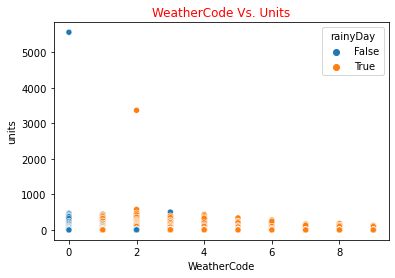

In [119]:
sns.scatterplot(data= merged, x='WeatherCode', y= 'units', hue= 'rainyDay')
plt.title("WeatherCode Vs. Units", color= 'red')
plt.show()

# Section C (Unit sales prediction)

Have to predict unit sales (units column), it is a numeric column so we have to chose a regression algorithm.

## Decision Tree Regressor

In [128]:
test = merged[merged['item_nbr'].isin([5,6,9,16,45])]
train = merged[~merged['item_nbr'].isin([5,6,9,16,45])]
X_test = test.drop(columns=['date','units', 'season'])
y_test = test['units']
X = train.drop(columns=['date','units', 'season'])
y = train['units']
X_train, X_val, y_train, y_val = train_test_split(
X, y, test_size=0.33, random_state=40)

In [129]:
dtRegressor = DecisionTreeRegressor(random_state=40)
dtRegressor.fit(X_train, y_train)
hp = {
    "max_depth" : [3,5,7,9,11],
    "max_leaf_nodes" : [10, 20,30,40, 50],
    "min_samples_leaf":[1,2,3,4,5]
}

# define grid search
reg_grid_search = GridSearchCV(estimator=dtRegressor, param_grid=hp, cv=10)

# fit estimator
reg_grid_search.fit(X_val, y_val)

# get best estimator
reg_best = reg_grid_search.best_estimator_

# print best parameters
pd.DataFrame.from_dict(reg_grid_search.best_params_, orient='index', columns=['Selected Value']).T

KeyboardInterrupt: 

## Adaboost Regressor

In [ ]:
dtrPreds = reg_best.predict(X_test)
print("Decision Tree Regressor mean_sqaured_error: ", mean_squared_error(y_test, dtrPreds))
print("Decision Tree Regressor r2_score: ", r2_score(y_test, dtrPreds))

In [130]:
adaReg = AdaBoostRegressor(random_state= 40)

# Hyperparametrs
hp = {
    'n_estimators' : [5, 10, 15, 30, 50, 80, 100],
    'learning_rate' : [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
}

# define grid search
ada_grid_search = GridSearchCV(estimator=adaReg, param_grid=hp, cv=10)

# fit estimator
ada_grid_search.fit(X_train, y_train)

# get best estimator
ada_best = ada_grid_search.best_estimator_

# print best parameters
pd.DataFrame.from_dict(ada_grid_search.best_params_, orient='index', columns=['Selected Value']).T

KeyboardInterrupt: 

In [ ]:
adaRegPreds = ada_best.predict(X_test)
print("Adaboost regressor mean_squared_error: ", mean_squared_error(y_test, adaRegPreds))
print("Adaboost regressor r2_score: ", r2_score(y_test, adaRegPreds))

## Gradientboost regressor

In [ ]:
gbr = GradientBoostingRegressor(random_state=40)
gbr.fit(X_train, y_train)
hp = {
    "n_estimators": [100,300,500],
    "max_depth": [3,5,7,9],
    "min_samples_split": [2,5,8,11],
    "learning_rate": [0.1,0.2,0.3],
    "loss": "squared_error",
}
# define grid search
gbr_grid_search = GridSearchCV(estimator=gbr, param_grid=hp, cv=10)

# fit estimator
gbr_grid_search.fit(X_train, y_train)

# get best estimator
gbr_best = gbr_grid_search.best_estimator_

# print best parameters
pd.DataFrame.from_dict(gbr_grid_search.best_params_, orient='index', columns=['Selected Value']).T

In [ ]:
gbrPreds = gbr_best.predict(X_test)
print("Gradient boost regressor mean_squared_error: ", mean_squared_error(y_test, gbrPreds))
print("Gradient boost regressor r2_score: ", r2_score(y_test, gbrPreds))

# Section D (predict rainy day) :

Have to predict whether it was raining or not (boolean) then it is a classification problem. We have to chose classification algorithms.

## Decision Tree Classifier

In [134]:
X = merged.drop(columns=['date','rainyDay', 'season'])
y = merged['rainyDay']
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.33, random_state=40)

In [ ]:
dtClassifier = DecisionTreeClassifierandom_state=40)
dtClassifier.fit(X_train, y_train)
hp = {
    "max_depth" : [3,5,7,9,11],
    "max_leaf_nodes" : [10, 20,30,40, 50],
    "min_samples_leaf":[1,2,3,4,5]
}

# define grid search
reg_grid_search = GridSearchCV(estimator=dtClassifier, param_grid=hp, cv=10)

# fit estimator
cls_grid_search.fit(X_train, y_train)

# get best estimator
cls_best = reg_grid_search.best_estimator_

# print best parameters
pd.DataFrame.from_dict(cls_grid_search.best_params_, orient='index', columns=['Selected Value']).T

In [ ]:
dtcPreds = cls_best.predict(X_test)
print("Decision Tree Classifier accuracy: ", accuracy_score(y_test, dtcPreds))

In [ ]:
adacls = AdaBoostClassifier(random_state= 40)

# Hyperparametrs
hp = {
    'n_estimators' : [5, 10, 15, 30, 50, 80, 100],
    'learning_rate' : [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
}

# define grid search
adacls_grid_search = GridSearchCV(estimator=adacls, param_grid=hp, cv=10)

# fit estimator
adacls_grid_search.fit(X_train, y_train)

# get best estimator
adacls_best = adacls_grid_search.best_estimator_

# print best parameters
pd.DataFrame.from_dict(adacls_grid_search.best_params_, orient='index', columns=['Selected Value']).T

In [ ]:
adacPreds = adacls_best.predict(X_test)
print("Adaboost classifier accuracy: ", accuracy_score(y_test, adacPreds))

In [ ]:
gbc = GradientBoostingClassifier(random_state=40)
gbc.fit(X_train, y_train)
hp = {
    "n_estimators": [100,300,500],
    "max_depth": [3,5,7,9],
    "min_samples_split": [2,5,8,11],
    "learning_rate": [0.1,0.2,0.3],
    "loss": "squared_error",
}
# define grid search
gbc_grid_search = GridSearchCV(estimator=gbc, param_grid=hp, cv=10)

# fit estimator
gbc_grid_search.fit(X_train, y_train)

# get best estimator
gbc_best = gbr_grid_search.best_estimator_

# print best parameters
pd.DataFrame.from_dict(gbc_grid_search.best_params_, orient='index', columns=['Selected Value']).T

In [ ]:
gbcPreds = gbc_best.predict(X_test)
print("Gradient boost Classifier accuracy: ", accuracy_score(y_test, gbcPreds))

# BONUS
# Section F (Clustering)

In [139]:
from sklearn.datasets import load_digits

data, labels = merged(return_X_y=True)
(n_samples, n_features), n_digits = len(merged), len(merged.columns)

print(f"# digits: {n_digits}; # samples: {n_samples}; # features {n_features}")

TypeError: 'DataFrame' object is not callable

In [ ]:
from time import time
from sklearn import metrics
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


def bench_k_means(kmeans, name, data, labels):
    """Benchmark to evaluate the KMeans initialization methods.

    Parameters
    ----------
    kmeans : KMeans instance
        A :class:`~sklearn.cluster.KMeans` instance with the initialization
        already set.
    name : str
        Name given to the strategy. It will be used to show the results in a
        table.
    data : ndarray of shape (n_samples, n_features)
        The data to cluster.
    labels : ndarray of shape (n_samples,)
        The labels used to compute the clustering metrics which requires some
        supervision.
    """
    t0 = time()
    estimator = make_pipeline(StandardScaler(), kmeans).fit(data)
    fit_time = time() - t0
    results = [name, fit_time, estimator[-1].inertia_]

    # Define the metrics which require only the true labels and estimator
    # labels
    clustering_metrics = [
        metrics.homogeneity_score,
        metrics.completeness_score,
        metrics.v_measure_score,
        metrics.adjusted_rand_score,
        metrics.adjusted_mutual_info_score,
    ]
    results += [m(labels, estimator[-1].labels_) for m in clustering_metrics]

    # The silhouette score requires the full dataset
    results += [
        metrics.silhouette_score(
            data,
            estimator[-1].labels_,
            metric="euclidean",
            sample_size=300,
        )
    ]

    # Show the results
    formatter_result = (
        "{:9s}\t{:.3f}s\t{:.0f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}"
    )
    print(formatter_result.format(*results))

In [ ]:
kmeans = KMeans(init="k-means++", n_clusters=n_digits, n_init=4, random_state=0)
bench_k_means(kmeans=kmeans, name="k-means++", data=merged)

kmeans = KMeans(init="random", n_clusters=n_digits, n_init=4, random_state=0)
bench_k_means(kmeans=kmeans, name="random", data=merged)